<a href="https://colab.research.google.com/github/tensorush/Phygitalism-3DML-Tasks/blob/master/Tasks/Task%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание задачи


Дана матрица $ A $:

$$
A = 
\begin{pmatrix}
    1 & 0 & 0\\
    1 & 1 & 0\\
    0 & -1 & 1000\\
\end{pmatrix}
$$

Необходимо найти $ A^n, $ где $ n \in \mathbb{N} $

# Решение задачи


Импортируем `numpy`.

In [ ]:
import numpy as np

Переберём все разумные способы при $n = 15$:

1. Воспользуемся встроенным `numpy` методом в качестве *benchmark*.

2. Вычислим $ A^n $ путем бинарного возведения в степень за $ O(log(n)) $.

3. Создадим эвристику для $ A^n $ на основе выявленной закономерности.

Cперва определим закономерность. *WolframAlpha* в помощь!

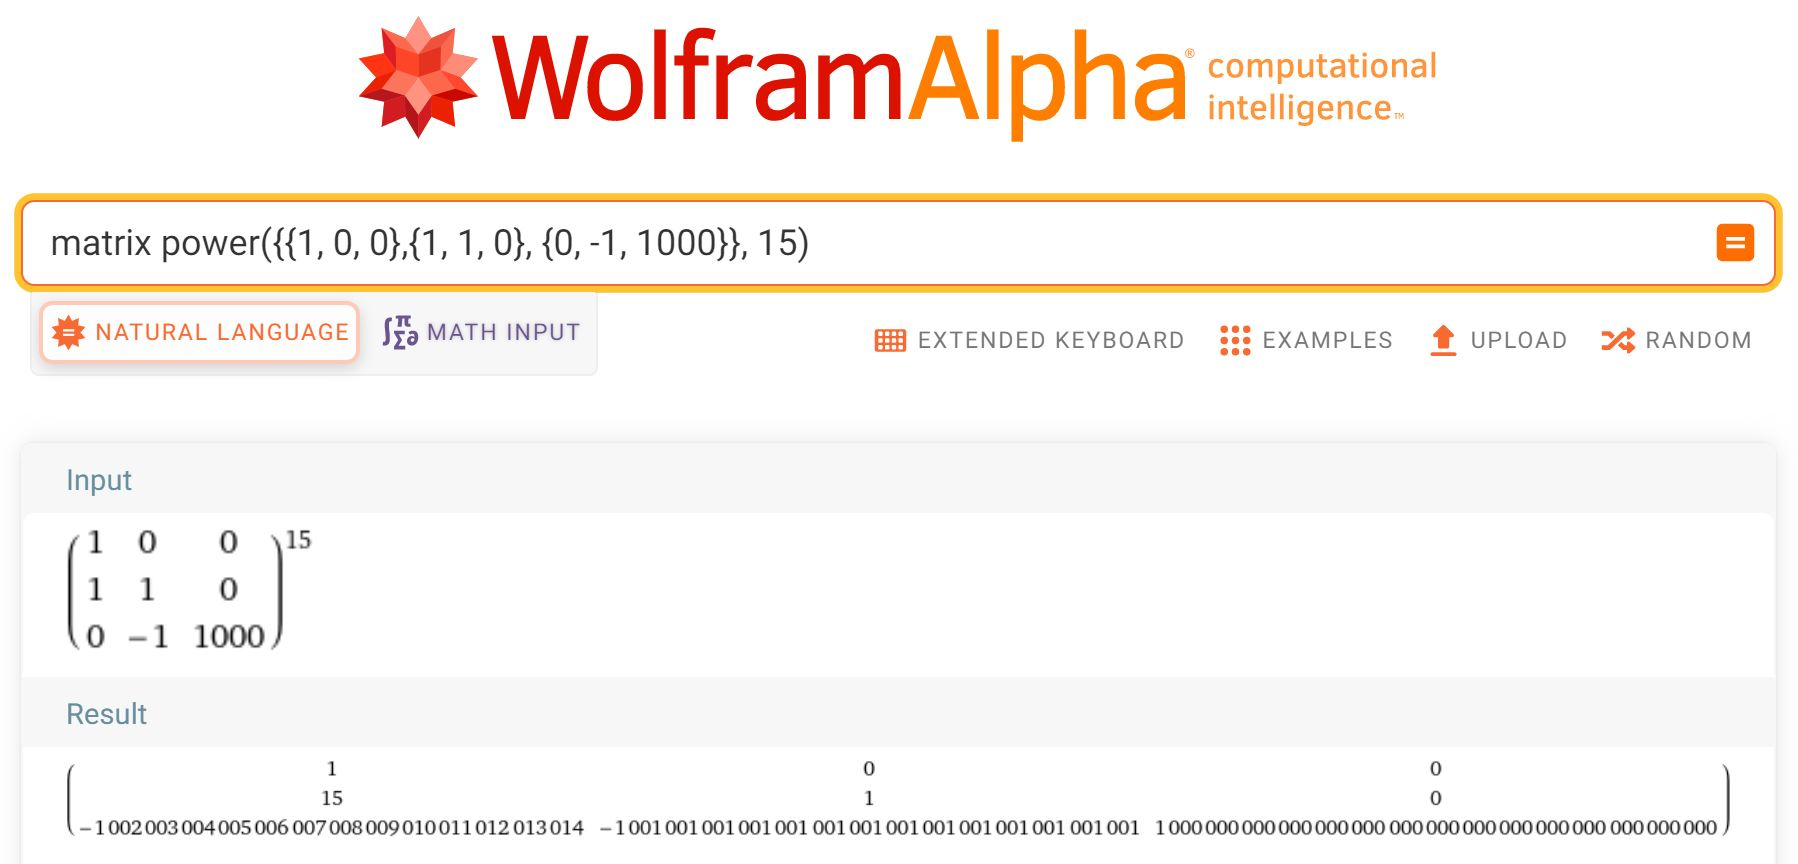

Получаем следующую формулу при $ n \in \mathbb{N} $ и $ n > 1 $:

$$
A = 
\begin{pmatrix}
    1 & 0 & 0\\
    n & 1 & 0\\
    \sum_1^{n-1}i\cdot1000^{n-i-1} & \sum_1^{n}1000^{i-1} & 1000^n\\
\end{pmatrix}
$$

Создадим соответствующие функции.

In [ ]:
def ad_hoc_exponentiation(A: np.array, n: int) -> np.array:
    """
    Compute A**n based on the discovered pattern in O(n) time.
    """
    if n == 1:
        return A
    B = np.array([[1, 0, 0],
                  [n, 1, 0],
                  [0, -1000**(n - 1), 1000**n]])
    for i in range(1, n):
        B[2][1] -= 1000**(i - 1)
        B[2][0] -= i * 1000**(n - i - 1)
    return B


def binary_exponentiation(A: np.array, n: int) -> np.array:
    """
    Compute A**n with binary exponentiation in O(log(n)) time.
    """
    if n == 1:
        return A
    B = np.eye(A.shape[0])
    while n:
        if n % 2 == 1:
            B = B @ A
        A = A @ A
        n //= 2
    return B

Вычислим $ A^{15} $ всеми тремя способами.

In [ ]:
n = 15
A = np.array([[1, 0, 0],
              [1, 1, 0],
              [0, -1, 1000]], dtype=float)
np.set_printoptions(precision=13)

print(f'Matrix A raised to the power of n = {n}:\n')
print(f'1) Built-in numpy method:')
print(f'{np.linalg.matrix_power(A, n)}\n')
print(f'2) Ad hoc exponentiation:')
print(f'{ad_hoc_exponentiation(A, n)}\n')
print(f'3) Binary exponentiation:')
print(f'{binary_exponentiation(A, n)}\n')

Matrix A raised to the power of n = 15:

1) Built-in numpy method:
[[ 1.000000000000e+00  0.000000000000e+00  0.000000000000e+00]
 [ 1.500000000000e+01  1.000000000000e+00  0.000000000000e+00]
 [-1.002003004005e+39 -1.001001001001e+42  1.000000000000e+45]]

2) Ad hoc exponentiation:
[[1 0 0]
 [15 1 0]
 [-1002003004005006007008009010011012013014
  -1001001001001001001001001001001001001001001
  1000000000000000000000000000000000000000000000]]

3) Binary exponentiation:
[[ 1.000000000000e+00  0.000000000000e+00  0.000000000000e+00]
 [ 1.500000000000e+01  1.000000000000e+00  0.000000000000e+00]
 [-1.002003004005e+39 -1.001001001001e+42  1.000000000000e+45]]



Плюс аналитического метода, конечно же, в том, что он не теряет точности на целочисленных матрицах, в то время, как остальные способы требуют явного преобразования элементов матрицы к типу `float`.